# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

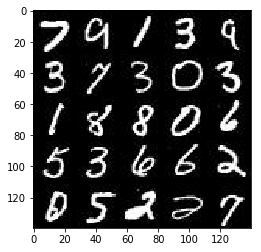

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

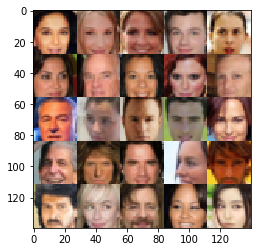

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_images')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_images, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator',reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        x4 = tf.layers.conv2d(relu3, 512, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(x3, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        
        # Flatten it
        flat = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits        

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim, is_train = True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0
    print_every=25
    show_every=200
    
    image_width = data_shape[1]
    image_height = data_shape[2]
    output_dim = data_shape[3]

    # Invoking model_inputs to get input_real, input_z, learn_rate placeholders created with appropriate dimensions
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, output_dim, z_dim)

    # Invoking model_loss to gather the discriminator and generator losses
    d_loss, g_loss = model_loss(input_real, input_z, output_dim)

    # Invoking model_opt to optimize the model   
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))                
                # Since, values in both MNIST and CelebA datasets are in the range of -0.5 to 0.5 multiply by 2 
                # to make it in range 0 to 1.0
                batch_images = batch_images * 2.0
                
                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % print_every == 0:
                    train_d_loss = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_g_loss = g_loss.eval({input_real: batch_images, input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_d_loss),
                          "Generator Loss: {:.4f}".format(train_g_loss))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, output_dim, data_image_mode)                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.8632
Epoch 1/2... Discriminator Loss: 2.2298... Generator Loss: 0.2359
Epoch 1/2... Discriminator Loss: 2.1106... Generator Loss: 0.2903
Epoch 1/2... Discriminator Loss: 1.4739... Generator Loss: 2.3894
Epoch 1/2... Discriminator Loss: 1.8514... Generator Loss: 0.2974
Epoch 1/2... Discriminator Loss: 1.6947... Generator Loss: 1.2186
Epoch 1/2... Discriminator Loss: 1.5463... Generator Loss: 1.5818
Epoch 1/2... Discriminator Loss: 1.8736... Generator Loss: 2.2354


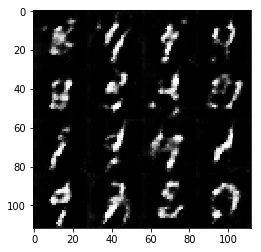

Epoch 1/2... Discriminator Loss: 1.4697... Generator Loss: 0.4679
Epoch 1/2... Discriminator Loss: 1.9518... Generator Loss: 0.2435
Epoch 1/2... Discriminator Loss: 1.6718... Generator Loss: 1.5999
Epoch 1/2... Discriminator Loss: 1.3602... Generator Loss: 0.6518
Epoch 1/2... Discriminator Loss: 1.3380... Generator Loss: 0.7735
Epoch 1/2... Discriminator Loss: 1.5385... Generator Loss: 1.8435
Epoch 1/2... Discriminator Loss: 1.4115... Generator Loss: 1.2654
Epoch 1/2... Discriminator Loss: 1.5504... Generator Loss: 1.0569


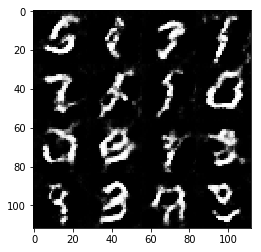

Epoch 1/2... Discriminator Loss: 1.4038... Generator Loss: 1.4380
Epoch 1/2... Discriminator Loss: 1.4486... Generator Loss: 0.5023
Epoch 1/2... Discriminator Loss: 1.3603... Generator Loss: 1.1926
Epoch 1/2... Discriminator Loss: 1.4499... Generator Loss: 1.9174
Epoch 1/2... Discriminator Loss: 1.6113... Generator Loss: 1.8649
Epoch 1/2... Discriminator Loss: 1.5694... Generator Loss: 0.4152
Epoch 1/2... Discriminator Loss: 1.1240... Generator Loss: 1.1548
Epoch 1/2... Discriminator Loss: 1.5271... Generator Loss: 1.8502


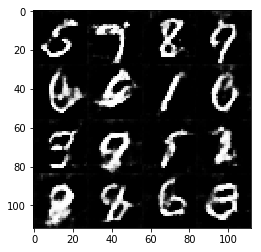

Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 1.0632
Epoch 1/2... Discriminator Loss: 1.3008... Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.9764... Generator Loss: 0.2397
Epoch 1/2... Discriminator Loss: 1.5050... Generator Loss: 1.5649
Epoch 1/2... Discriminator Loss: 1.2708... Generator Loss: 1.5418
Epoch 1/2... Discriminator Loss: 2.3321... Generator Loss: 0.1859
Epoch 1/2... Discriminator Loss: 1.5133... Generator Loss: 1.8871
Epoch 1/2... Discriminator Loss: 2.2081... Generator Loss: 0.1934


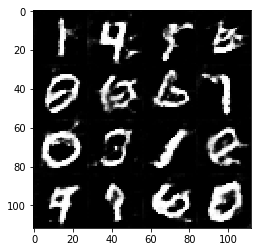

Epoch 1/2... Discriminator Loss: 3.1601... Generator Loss: 3.8180
Epoch 1/2... Discriminator Loss: 1.6149... Generator Loss: 0.3711
Epoch 1/2... Discriminator Loss: 1.6974... Generator Loss: 0.3359
Epoch 1/2... Discriminator Loss: 1.6093... Generator Loss: 0.3761
Epoch 1/2... Discriminator Loss: 1.1599... Generator Loss: 1.8674
Epoch 2/2... Discriminator Loss: 2.6174... Generator Loss: 0.1637
Epoch 2/2... Discriminator Loss: 1.9185... Generator Loss: 0.2687
Epoch 2/2... Discriminator Loss: 1.1507... Generator Loss: 1.4953


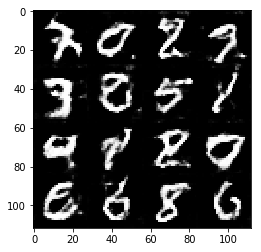

Epoch 2/2... Discriminator Loss: 2.2498... Generator Loss: 0.2062
Epoch 2/2... Discriminator Loss: 2.2444... Generator Loss: 0.2344
Epoch 2/2... Discriminator Loss: 1.0685... Generator Loss: 1.1778
Epoch 2/2... Discriminator Loss: 1.3327... Generator Loss: 0.5498
Epoch 2/2... Discriminator Loss: 1.0086... Generator Loss: 0.8700
Epoch 2/2... Discriminator Loss: 1.5174... Generator Loss: 0.4268
Epoch 2/2... Discriminator Loss: 1.1431... Generator Loss: 0.6990
Epoch 2/2... Discriminator Loss: 1.3923... Generator Loss: 0.5362


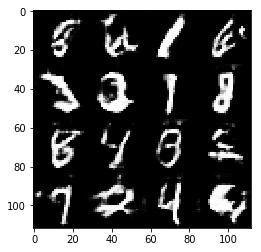

Epoch 2/2... Discriminator Loss: 1.1191... Generator Loss: 1.9521
Epoch 2/2... Discriminator Loss: 1.8737... Generator Loss: 0.3091
Epoch 2/2... Discriminator Loss: 1.0275... Generator Loss: 1.7749
Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 1.3240
Epoch 2/2... Discriminator Loss: 1.1924... Generator Loss: 0.7342
Epoch 2/2... Discriminator Loss: 0.8300... Generator Loss: 1.1832
Epoch 2/2... Discriminator Loss: 0.9859... Generator Loss: 1.1621
Epoch 2/2... Discriminator Loss: 1.1822... Generator Loss: 0.6947


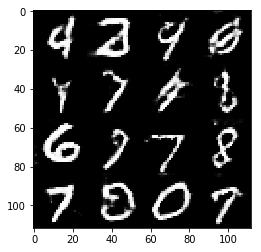

Epoch 2/2... Discriminator Loss: 0.9910... Generator Loss: 1.1262
Epoch 2/2... Discriminator Loss: 1.0164... Generator Loss: 0.8275
Epoch 2/2... Discriminator Loss: 1.0847... Generator Loss: 1.0901
Epoch 2/2... Discriminator Loss: 0.9680... Generator Loss: 1.8959
Epoch 2/2... Discriminator Loss: 0.7581... Generator Loss: 1.4205
Epoch 2/2... Discriminator Loss: 0.7451... Generator Loss: 1.4060
Epoch 2/2... Discriminator Loss: 1.6345... Generator Loss: 0.4246
Epoch 2/2... Discriminator Loss: 1.6388... Generator Loss: 0.4736


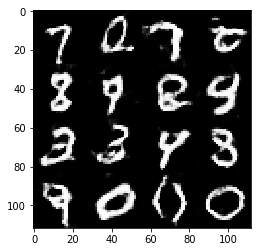

Epoch 2/2... Discriminator Loss: 1.8741... Generator Loss: 0.3493
Epoch 2/2... Discriminator Loss: 1.3465... Generator Loss: 0.5931
Epoch 2/2... Discriminator Loss: 1.0226... Generator Loss: 2.8285
Epoch 2/2... Discriminator Loss: 0.6643... Generator Loss: 1.5363
Epoch 2/2... Discriminator Loss: 2.0310... Generator Loss: 0.3147
Epoch 2/2... Discriminator Loss: 1.6537... Generator Loss: 0.4256
Epoch 2/2... Discriminator Loss: 1.8163... Generator Loss: 0.4738
Epoch 2/2... Discriminator Loss: 1.1650... Generator Loss: 0.6867


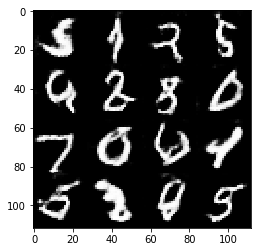

Epoch 2/2... Discriminator Loss: 0.8658... Generator Loss: 1.6046
Epoch 2/2... Discriminator Loss: 1.0574... Generator Loss: 0.8575


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.5079... Generator Loss: 1.0396
Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 1.3091
Epoch 1/1... Discriminator Loss: 1.5758... Generator Loss: 1.5252
Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 1.5587... Generator Loss: 1.0104
Epoch 1/1... Discriminator Loss: 1.6276... Generator Loss: 0.5405
Epoch 1/1... Discriminator Loss: 1.9534... Generator Loss: 1.7801
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.9386


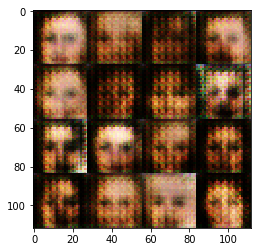

Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.8672
Epoch 1/1... Discriminator Loss: 1.3424... Generator Loss: 0.6403
Epoch 1/1... Discriminator Loss: 1.1491... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.8914
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7571
Epoch 1/1... Discriminator Loss: 1.4323... Generator Loss: 1.7596


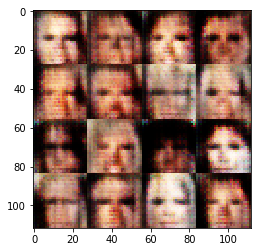

Epoch 1/1... Discriminator Loss: 1.7006... Generator Loss: 0.5505
Epoch 1/1... Discriminator Loss: 1.4896... Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.0119... Generator Loss: 0.9389
Epoch 1/1... Discriminator Loss: 1.6725... Generator Loss: 1.0101
Epoch 1/1... Discriminator Loss: 1.6494... Generator Loss: 0.4591
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.5167... Generator Loss: 1.1723
Epoch 1/1... Discriminator Loss: 1.2535... Generator Loss: 0.6074


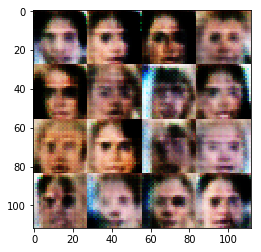

Epoch 1/1... Discriminator Loss: 2.0640... Generator Loss: 0.2238
Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.5494
Epoch 1/1... Discriminator Loss: 1.0826... Generator Loss: 0.7379
Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 1.4816
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.8944
Epoch 1/1... Discriminator Loss: 1.2147... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 1.4674... Generator Loss: 0.4785
Epoch 1/1... Discriminator Loss: 1.8434... Generator Loss: 0.3341


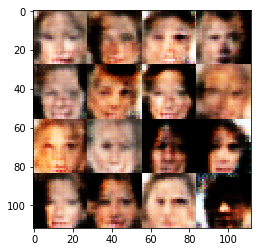

Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 1.7841
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 0.9377
Epoch 1/1... Discriminator Loss: 0.9602... Generator Loss: 1.6791
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 1.9426
Epoch 1/1... Discriminator Loss: 0.8834... Generator Loss: 1.2188
Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 2.0418
Epoch 1/1... Discriminator Loss: 2.6298... Generator Loss: 3.4912
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 1.6415


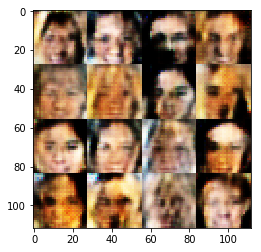

Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.7289
Epoch 1/1... Discriminator Loss: 1.5993... Generator Loss: 0.4486
Epoch 1/1... Discriminator Loss: 0.7712... Generator Loss: 1.4858
Epoch 1/1... Discriminator Loss: 0.6938... Generator Loss: 1.5609
Epoch 1/1... Discriminator Loss: 0.5696... Generator Loss: 2.4596
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 3.1194
Epoch 1/1... Discriminator Loss: 0.8557... Generator Loss: 1.1756
Epoch 1/1... Discriminator Loss: 2.6019... Generator Loss: 0.1532


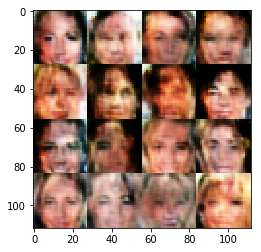

Epoch 1/1... Discriminator Loss: 0.4652... Generator Loss: 2.3277
Epoch 1/1... Discriminator Loss: 3.5427... Generator Loss: 0.0488
Epoch 1/1... Discriminator Loss: 1.2439... Generator Loss: 0.8173
Epoch 1/1... Discriminator Loss: 0.5814... Generator Loss: 2.3904
Epoch 1/1... Discriminator Loss: 1.5139... Generator Loss: 0.5259
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 0.7328
Epoch 1/1... Discriminator Loss: 2.0484... Generator Loss: 3.8873
Epoch 1/1... Discriminator Loss: 0.9703... Generator Loss: 0.9708


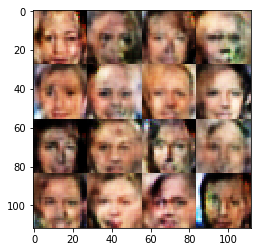

Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 2.7400
Epoch 1/1... Discriminator Loss: 0.8423... Generator Loss: 1.1465
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 0.6275... Generator Loss: 1.6656
Epoch 1/1... Discriminator Loss: 0.5030... Generator Loss: 2.0741
Epoch 1/1... Discriminator Loss: 0.4550... Generator Loss: 2.6313
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 0.9266... Generator Loss: 1.1215


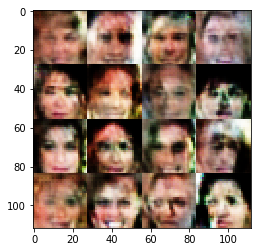

Epoch 1/1... Discriminator Loss: 3.7283... Generator Loss: 0.0569
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 0.8333
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 0.6971... Generator Loss: 1.3311
Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 0.6462... Generator Loss: 1.6347
Epoch 1/1... Discriminator Loss: 0.5957... Generator Loss: 1.7470
Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 1.0248


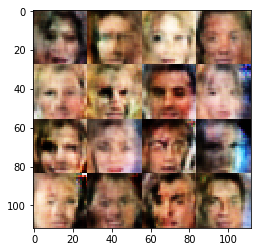

KeyboardInterrupt: 

In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.